In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

In [152]:
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [153]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


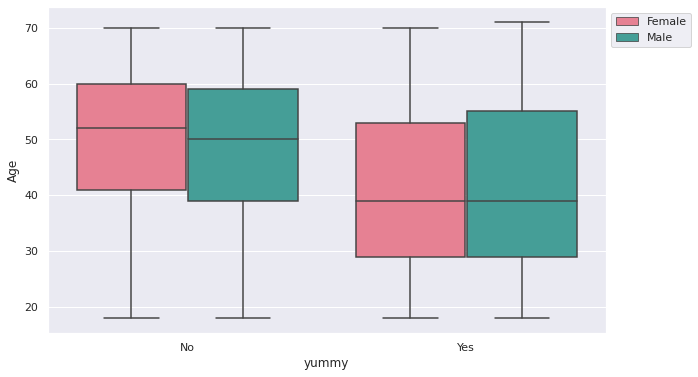

In [154]:
sns.boxplot(data = data, x = 'yummy', y = 'Age', hue='Gender', palette='husl')
plt.legend(bbox_to_anchor = (1,1))

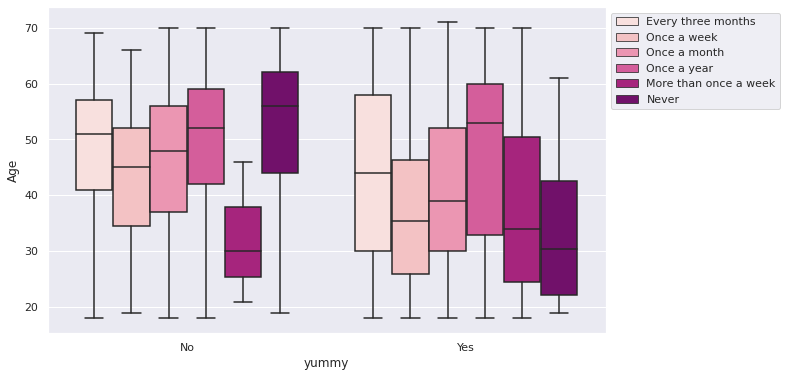

In [156]:
sns.boxplot(data = data, x = 'yummy', y = 'Age', hue='VisitFrequency',  palette='RdPu')
plt.legend(bbox_to_anchor = (1,1))

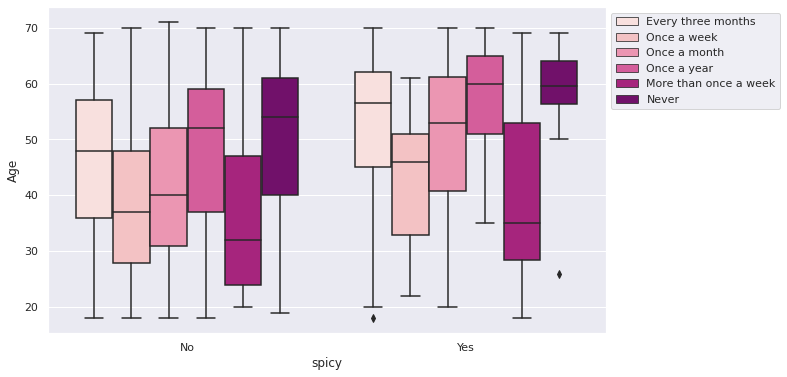

In [185]:
sns.boxplot(data = data, x = 'spicy', y = 'Age', hue='VisitFrequency', palette='RdPu')
plt.legend(bbox_to_anchor = (1,1))

In [158]:
data1 = data.copy()

In [159]:
data1 = data1.iloc[:,0:-4]

In [160]:
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [161]:
data1.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [162]:
data2 = data1.copy()

In [155]:
dat1 = data.replace(to_replace = ['Yes','No'],value = [1,0])
dat1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


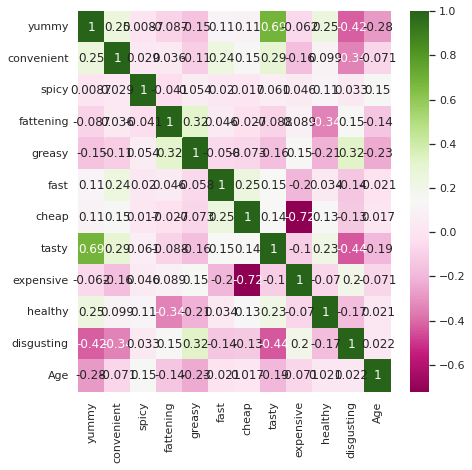

In [184]:
plt.figure(figsize=(7,7))
sns.heatmap(dat1.corr(), annot=True, cmap="PiYG")
plt.show()

In [163]:
for col in (data2.columns):
    data2[col] = data2[col].map({'Yes':1, 'No':0})

In [164]:
data2.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [165]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [166]:
pca = PCA(n_components=2)
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
components = pca.fit_transform(data2)
loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [167]:
from sklearn.cluster import KMeans

In [168]:
mat_data2 = data2.values

In [170]:
l = []
for i in range(2,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(mat_data2)
    l.append(kmeans.inertia_)

In [172]:
wcss = pd.DataFrame({'Clusters':list(range(2,15)), 'WCSS':l})

In [174]:

px.bar(data_frame=wcss, x='Clusters', y='WCSS')

In [176]:
kmeans = KMeans(4)
kmeans.fit(data2)
data2['Predicted_Clusters'] = kmeans.predict(data2)

In [177]:
data2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Predicted_Clusters
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,3


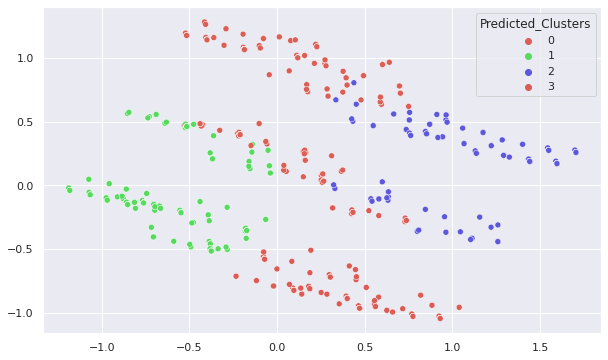

In [178]:
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(x = components[:,0], y = components[:,1], hue=data2['Predicted_Clusters'], palette='hls')

In [179]:
pca.fit_transform(kmeans.cluster_centers_)

array([[-0.20001977, -0.82596734],
       [-0.94545081,  0.15137448],
       [ 0.98528655, -0.15774   ],
       [ 0.16018403,  0.83233286]])

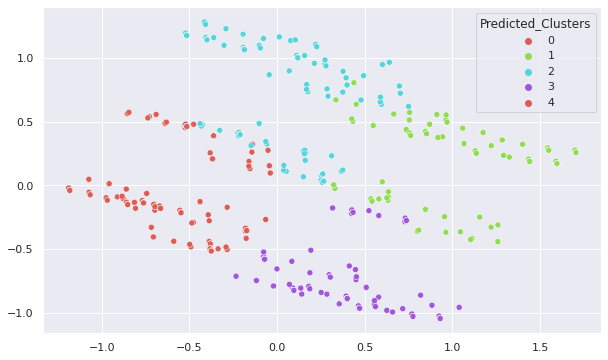

In [180]:
kmeans = KMeans(5)
kmeans.fit(data2)
data2['Predicted_Clusters'] = kmeans.predict(data2)

plt.rcParams['figure.figsize'] = (10,6)
sns.color_palette("tab10", as_cmap=True)
sns.scatterplot(x = components[:,0], y = components[:,1], hue=data2['Predicted_Clusters'], palette='hls')

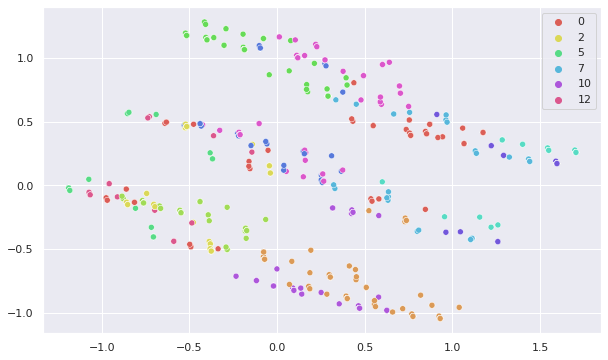

In [181]:
kmeans = KMeans(14)
kmeans.fit(data2)
data2['Predicted_Clusters'] = kmeans.predict(data2)

plt.rcParams['figure.figsize'] = (10,6)
sns.color_palette("tab10", as_cmap=True)
sns.scatterplot(x = components[:,0], y = components[:,1], hue=data2['Predicted_Clusters'], palette='hls')
plt.legend(bbox_to_anchor = (1,1))